In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from catboost import CatBoostClassifier, cv, Pool
from sklearn.metrics import accuracy_score

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = pd.read_csv("train.csv")

In [3]:
lb = LabelEncoder()
data['Embarked'] = lb.fit_transform(data['Embarked'].astype(str))
data['Sex'] = lb.fit_transform(data['Sex'].astype(str))
data['Cabin'] = lb.fit_transform(data['Cabin'].astype(str))
data = data.fillna(data.median())

In [4]:
full_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]
#full_data = data[['Sex', 'Age']]
full_sur = data[['Survived']]
type(full_sur)

pandas.core.frame.DataFrame

In [5]:
train, test, train_sur, test_sur = train_test_split(full_data, full_sur, train_size=0.70, test_size=0.30)

In [6]:
#params = {RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC() }
params = {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.1, 1, 10]}

model = AdaBoostClassifier()
ada_random = GridSearchCV(model, param_grid=params, cv = 3, verbose=10)
ada_random.fit(train, train_sur)
print("Best parameters found: ", ada_random.best_params_)
print("Best accuracy found: ", ada_random.best_score_)
gb_mean = ada_random.score(test, test_sur)
print(gb_mean)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.769, total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, n_estimators=50, score=0.812, total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .. learning_rate=0.1, n_estimators=50, score=0.787, total=   0.1s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.1, n_estimators=100, score=0.784, total=   0.2s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.812, total=   0.2s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.1, n_estimators=100, score=0.797, total=   0.2s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.1, n_estimators=200, score=0.784, total=   0.3s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.1, n_estimators=200, score=0.808, total=   0.3s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.1, n_estimators=200, score=0.783, total=   0.4s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] .... learning_rate=1, n_estimators=50, score=0.784, total=   0.1s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] .... learning_rate=1, n_estimators=50, score=0.812, total=   0.1s
[CV] learning_rate=1, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... learning_rate=1, n_estimators=50, score=0.773, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=1, n_estimators=100 ...............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... learning_rate=1, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ... learning_rate=1, n_estimators=100, score=0.792, total=   0.2s
[CV] learning_rate=1, n_estimators=200 ...............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... learning_rate=1, n_estimators=200, score=0.793, total=   0.5s
[CV] learning_rate=1, n_estimators=200 ...............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... learning_rate=1, n_estimators=200, score=0.788, total=   0.5s
[CV] learning_rate=1, n_estimators=200 ...............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... learning_rate=1, n_estimators=200, score=0.792, total=   0.5s
[CV] learning_rate=10, n_estimators=50 ...............................
[CV] ... learning_rate=10, n_estimators=50, score=0.375, total=   0.1s
[CV] learning_rate=10, n_estimators=50 ...............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... learning_rate=10, n_estimators=50, score=0.207, total=   0.2s
[CV] learning_rate=10, n_estimators=50 ...............................
[CV] ... learning_rate=10, n_estimators=50, score=0.377, total=   0.1s
[CV] learning_rate=10, n_estimators=100 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=100, score=0.375, total=   0.3s
[CV] learning_rate=10, n_estimators=100 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=100, score=0.207, total=   0.4s
[CV] learning_rate=10, n_estimators=100 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=100, score=0.377, total=   0.2s
[CV] learning_rate=10, n_estimators=200 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=200, score=0.375, total=   0.4s
[CV] learning_rate=10, n_estimators=200 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=200, score=0.207, total=   0.7s
[CV] learning_rate=10, n_estimators=200 ..............................


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=10, n_estimators=200, score=0.377, total=   0.3s
Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100}
Best accuracy found:  0.797752808988764


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.8s finished
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7985074626865671


In [7]:
# DecisionTree Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=2)

ada_param = [{
    "base_estimator__criterion" : ["gini", "entropy"],
    "base_estimator__splitter" :   ["best", "random"],
    "n_estimators" :[30,100,300],
    "learning_rate":  [0.01, 0.03, 0.1, 0.3]
}]

gs_adaDTC = GridSearchCV(adaDTC,param_grid = ada_param, cv=10, scoring="accuracy", n_jobs= 2, verbose = 1)

gs_adaDTC.fit(train,train_sur)
gs_adaDTC.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   43.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 480 out of 480 | elapsed:  1.6min finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.01,
 'n_estimators': 300}

In [8]:
 # Random Forest
RFC = RandomForestClassifier()

#rf_param = [
#    {#"bootstrap": [False],
#     'n_estimators':[30,100,300]}
#]
rf_param = { 
    'base_estimator__n_estimators': [200, 500],
    'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'base_estimator__max_depth' : [4,5,6,7,8],
    'base_estimator__criterion' :['gini', 'entropy']
}
ABC = AdaBoostClassifier(base_estimator = RFC)
grid_search_ABC = GridSearchCV(ABC,param_grid = rf_param)

#for param in ABC.get_params().keys():
#    print(param)
grid_search_ABC.fit(train, train_sur)
gs_RFC.best_params_
    #Random Forest
#RFC = RandomForestClassifier()

#rf_param = [
#    {"bootstrap": [False],'n_estimators':[30,100,300]}
#]

#gs_RFC = GridSearchCV(RFC,param_grid = rf_param, cv=10, scoring="accuracy", n_jobs= 2, verbose = 1)

#gs_RFC.fit(train, train_sur)
#gs_RFC.best_params_


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    4.0s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False, 'n_estimators': 30}

In [9]:
SVMC = SVC(probability=True)
SVM_param = { 
    'base_estimator__C' : [0.1, 1, 10],
    'base_estimator__gamma' : [0.1, 1, 10]
}

ABC = AdaBoostClassifier(base_estimator = SVMC)
gs_ABC = GridSearchCV(ABC,param_grid = SVM_param, cv=10, scoring="accuracy")
#for param in ABC.get_params().keys():
#    print(param)
gs_ABC.fit(train, train_sur)
gs_ABC.best_params_



#SVMC = SVC(probability=True)
#SVM_param = [{
#    'kernel': ['rbf'], 
#    'gamma': [ 0.01, 0.03, 0.1],
#    'C': [1, 3, 10, 30,100],
#                 }]

#gs_SVM = GridSearchCV(SVMC,param_grid = SVM_param, cv=10, scoring="accuracy", n_jobs= 2, verbose = 1)

#gs_SVM.fit(train, train_sur)

#gs_SVM.best_params_


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    7.2s finished
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [10]:
 # Gradient boosting

GBC = GradientBoostingClassifier()
adaGBC = AdaBoostClassifier(base_estimator = GBC, random_state=2)
gb_param = {
              'n_estimators' : [100,300],
              'learning_rate': [0.01, 0.03, 0.1],
              'base_estimator__max_depth': [3, 10]
              }

gs_GBC = GridSearchCV(adaGBC, param_grid = gb_param, cv=10, 
                      scoring="accuracy",
                       verbose = 1)
#for param in adaGBC.get_params().keys():
#    print(param)
gs_GBC.fit(train, train_sur)
gs_GBC.best_params_
    
    # Gradient boosting

#GBC = GradientBoostingClassifier()
#adaGBC = AdaBoostClassifier(base_estimator = GBC, random_state=2)
#gb_param = {
#              'n_estimators' : [100,300],
#              'learning_rate': [0.01, 0.03, 0.1],
             #'max_depth': [3, 10]
#              }

#gs_GBC = GridSearchCV(adaGBC, param_grid = gb_param, cv=10, 
#                      scoring="accuracy",
#                      n_jobs= 2, verbose = 1)

#gs_GBC.fit(train, train_sur)
#print(gs_GBC.best_params_)
    
    #Gradient boosting

#GBC = GradientBoostingClassifier()
#gb_param = [{
#              'n_estimators' : [100,300],
#              'learning_rate': [0.01, 0.03, 0.1],
#              'max_depth': [3, 10],
#              }]

#gs_GBC = GridSearchCV(GBC,param_grid = gb_param, cv=10, scoring="accuracy", n_jobs= 2, verbose = 1)

#gs_GBC.fit(train, train_sur)
#gs_GBC.best_params_

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Done  63 tasks      | elapsed:   20.2s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:   39.6s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [11]:
#построим кривую обучения, чтобы увидеть оценку точности в зависимости от размера обучения. 
#Это хороший способ увидеть эффект перенасыщения.
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """generate training and testing dataset training curve."""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("the size of Training set")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    # train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    # test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    # plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    # plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    
    
    plt.legend(loc="best")
    return

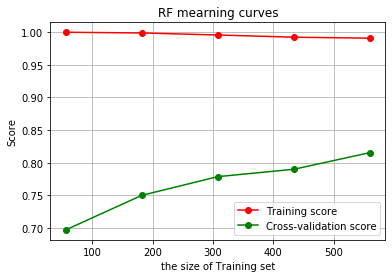

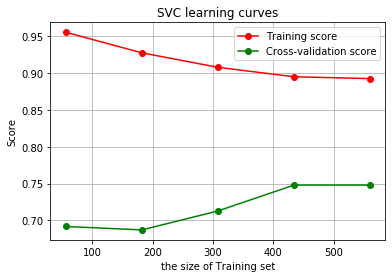

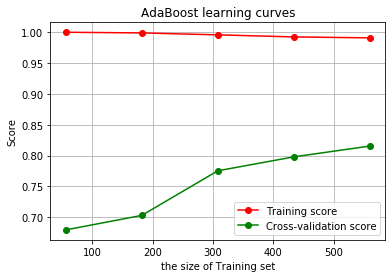

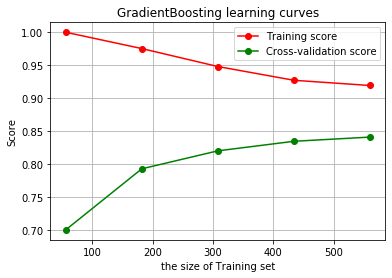

In [12]:
from sklearn.model_selection import  learning_curve
g = plot_learning_curve(gs_RFC.best_estimator_,"RF mearning curves",train, train_sur,cv=10)
g = plot_learning_curve(gs_SVM.best_estimator_,"SVC learning curves",train, train_sur,cv=10)
g = plot_learning_curve(gs_adaDTC.best_estimator_,"AdaBoost learning curves",train, train_sur,cv=10)
g = plot_learning_curve(gs_GBC.best_estimator_,"GradientBoosting learning curves",train, train_sur,cv=10)

In [13]:
SVM_best = gs_SVM.best_estimator_
print(SVM_best)
RFC_best = gs_RFC.best_estimator_
print(RFC_best)
ada_best = gs_adaDTC.best_estimator_
print(ada_best)
GBC_best = gs_GBC.best_estimator_
print(GBC_best)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
               

In [14]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
('svc', SVM_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=2)

votingC = votingC.fit(train, train_sur)
votingC.score(test, test_sur)

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8022388059701493

In [15]:
#test_Survived = pd.Series(votingC.predict(test), name="Survived")

#results = pd.concat([IDtest,test_Survived],axis=1)

#results.to_csv("ensemble_python_voting.csv",index=False)

In [39]:
    #boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
    #parameters = {'n_estimators': (1, 2),
    #              'base_estimator__max_depth': (1, 2),
    #              'algorithm': ('SAMME', 'SAMME.R')}
    #clf = GridSearchCV(boost, parameters)
    #clf.fit(train, train_sur)
    #clf.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

{'algorithm': 'SAMME', 'base_estimator__max_depth': 1, 'n_estimators': 1}